In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
del_2024=pd.read_csv('.\Cricsheet\ipl_2024_deliveries.csv')
print(del_2024.head().to_string())
print(del_2024.columns)
print("\n\n")

mat_2024=pd.read_csv('.\Cricsheet\ipl_2024_matches.csv')
mat_2024=np.array(mat_2024)
# print(mat_2024.shape)
print(mat_2024.to_string())

   match_id  season  match_no        date                                              venue batting_team bowling_team  innings  over       striker   non_striker     bowler  runs_of_bat  extras  wide  legbyes  byes  noballs wicket_type player_dismissed fielder
0    202401    2024         1  2024-03-22  MA Chidambaram Stadium, Chepauk, Chennai, Chennai          RCB          CSK        1   0.1       V Kohli  F du Plessis  DL Chahar            0       1     1        0     0        0         NaN              NaN     NaN
1    202401    2024         1  2024-03-22  MA Chidambaram Stadium, Chepauk, Chennai, Chennai          RCB          CSK        1   0.1       V Kohli  F du Plessis  DL Chahar            1       0     0        0     0        0         NaN              NaN     NaN
2    202401    2024         1  2024-03-22  MA Chidambaram Stadium, Chepauk, Chennai, Chennai          RCB          CSK        1   0.2  F du Plessis       V Kohli  DL Chahar            0       0     0        0     0   

In [3]:
#Batsmen
batsman = pd.DataFrame(columns=['player', 'runs', 'balls', 'outs'])

for idx, row in del_2024.iterrows():
    striker = row['striker']
    
    if striker in batsman['player'].values:
        batsman.loc[batsman['player'] == striker, 'runs'] += row['runs_of_bat']
        batsman.loc[batsman['player'] == striker, 'balls'] += 1
        if row['player_dismissed'] == striker:
            batsman.loc[batsman['player'] == striker, 'outs'] += 1
    else:
        new_row = pd.DataFrame({
            'player': [striker],
            'runs': [row['runs_of_bat']],
            'balls': [1],
            'outs': [1 if row['player_dismissed'] == striker else 0]
        })
        batsman = pd.concat([batsman, new_row], ignore_index=True)

print(batsman)
batsman.to_csv('batsman.csv')

                 player runs balls outs
0               V Kohli  741   497   12
1          F du Plessis  438   276   14
2            RM Patidar  395   237   13
3            GJ Maxwell   52    46    9
4               C Green  255   185    8
..                  ...  ...   ...  ...
165       Naveen-ul-Haq    2     4    0
166    T Kohler-Cadmore   48    54    3
167        Shivam Singh    2     3    0
168        V Viyaskanth    7     5    0
169  Rahmanullah Gurbaz   62    50    2

[170 rows x 4 columns]


In [4]:
#Bowlers
bowler = pd.DataFrame(columns=['player', 'runs', 'balls', 'wickets'])

for idx, row in del_2024.iterrows():
    bowler_name = row['bowler']
    
    if bowler_name in bowler['player'].values:
        bowler.loc[bowler['player'] == bowler_name, 'runs'] += row['runs_of_bat']
        bowler.loc[bowler['player'] == bowler_name, 'balls'] += 1
        if not pd.isna(row['player_dismissed']):
            bowler.loc[bowler['player'] == bowler_name, 'wickets'] += 1
    else:
        new_row = pd.DataFrame({
            'player': [bowler_name],
            'runs': [row['runs_of_bat']],
            'balls': [1],
            'wickets': [1 if not pd.isna(row['player_dismissed']) else 0]
        })
        bowler = pd.concat([bowler, new_row], ignore_index=True)

print(bowler.head())
bowler.to_csv('bowler.csv')


              player runs balls wickets
0          DL Chahar  197   146       5
1       TU Deshpande  401   310      18
2       M Theekshana  143   121       2
3  Mustafizur Rahman  299   225      14
4          RA Jadeja  366   285       8


C:\Users\india\AppData\Local\Temp\ipykernel_41332\2517708604.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  batsman = batsman.replace([np.inf, -np.inf], np.nan).dropna(subset=['average', 'strike_rate'])


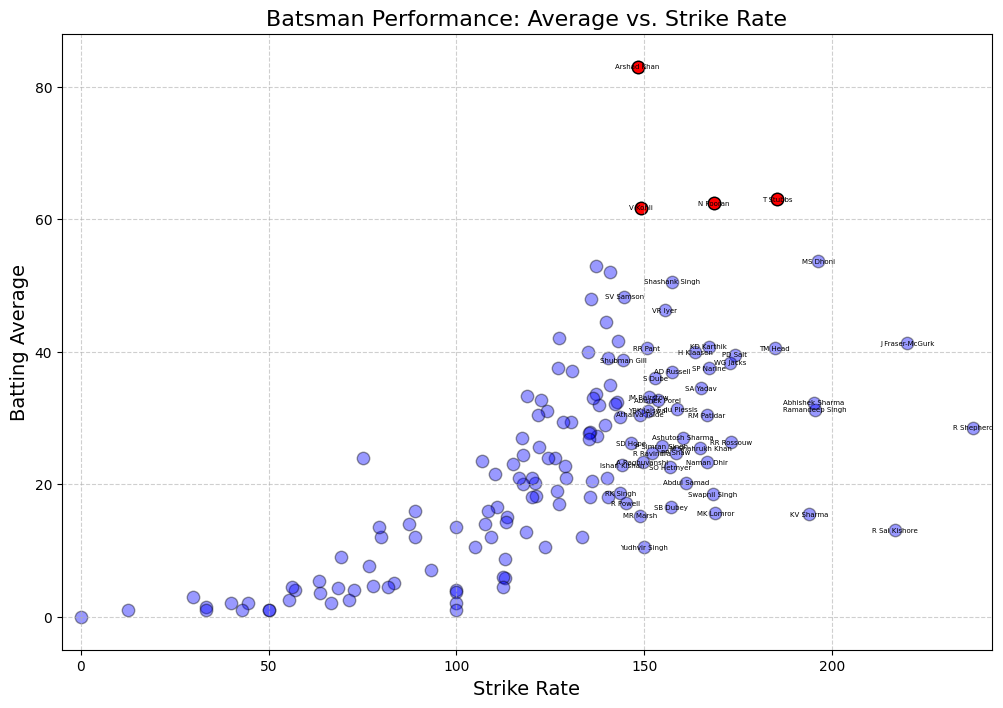

In [5]:
import matplotlib.pyplot as plt
import numpy as np


batsman['average'] = batsman.apply(lambda x: x['runs'] / x['outs'] if x['outs'] > 0 else np.nan, axis=1)
batsman['strike_rate'] = (batsman['runs'] / batsman['balls']) * 100

# Replace infinite values with NaN and drop rows with NaN in the relevant columns
batsman = batsman.replace([np.inf, -np.inf], np.nan).dropna(subset=['average', 'strike_rate'])

batsman_sorted = batsman.sort_values(by=['strike_rate', 'average'], ascending=False)

plt.figure(figsize=(12, 8))

plt.scatter(batsman_sorted['strike_rate'], batsman_sorted['average'], color='blue', alpha=0.4, edgecolors='k', s=80)

top_n = 50
for i, player in batsman_sorted.head(top_n).iterrows():
    plt.text(player['strike_rate'], player['average'], player['player'], fontsize=5, ha='center', va='center')

plt.xlabel('Strike Rate', fontsize=14)
plt.ylabel('Batting Average', fontsize=14)
plt.title('Batsman Performance: Average vs. Strike Rate', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.6)

plt.xlim(batsman_sorted['strike_rate'].min() - 5, batsman_sorted['strike_rate'].max() + 5)
plt.ylim(batsman_sorted['average'].min() - 5, batsman_sorted['average'].max() + 5)

batsman_sorted['z_score'] = (batsman_sorted['average'] - batsman_sorted['average'].mean()) / batsman_sorted['average'].std()
outliers = batsman_sorted[batsman_sorted['z_score'].abs() > 2]
for i, player in outliers.iterrows():
    plt.scatter(player['strike_rate'], player['average'], color='red', edgecolors='k', s=80)

plt.show()



        player  runs  balls  outs    average  strike_rate
0      V Kohli   741    497    12  61.750000   149.094567
7   RD Gaikwad   583    425    11  53.000000   137.176471
52     R Parag   573    407    11  52.090909   140.786241
86     TM Head   567    307    14  40.500000   184.690554
51   SV Samson   531    367    11  48.272727   144.686649


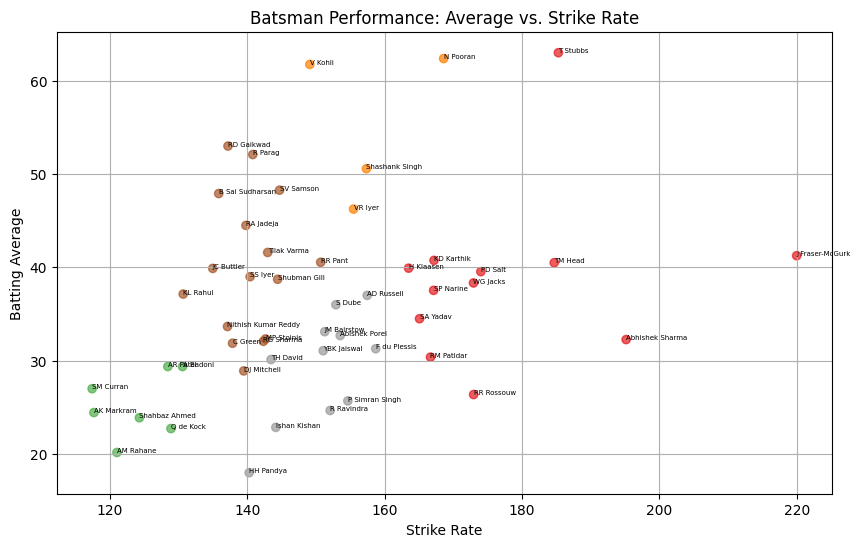

In [6]:
#kmeans clustering the top 50 batsmen

from sklearn.cluster import KMeans
from sklearn.utils import shuffle

top_batsmen = batsman.sort_values(by='runs', ascending=False).head(50)
print(top_batsmen.head())

req_df=top_batsmen[['player','average','strike_rate']]
req_df.head()

req_df = shuffle(req_df)

model=KMeans(n_clusters=5,random_state=42)
model.fit(req_df[['average','strike_rate']])
req_df['cluster']=model.predict(req_df[['average','strike_rate']])
req_df.head()
#plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(req_df['strike_rate'], req_df['average'], c=req_df['cluster'], cmap='Set1', alpha=0.7)

for i, player in req_df.iterrows():
    plt.text(player['strike_rate'], player['average'], player['player'], fontsize=5)

plt.xlabel('Strike Rate')
plt.ylabel('Batting Average')
plt.title('Batsman Performance: Average vs. Strike Rate')
plt.grid(True)
plt.show()


In [7]:
rows = []

for index, match_row in mat_2024.iterrows():
    match_id = match_row['match_id']
    team_1 = match_row['team1']
    team_2 = match_row['team2']
    venue = match_row['venue']
    winning_team = match_row['winning_team']
    
    target = 1 if winning_team == team_1 else 2

    match_deliveries = del_2024[del_2024['match_id'] == match_id]

    cumulative_runs_innings_1 = 0
    cumulative_wickets_innings_1 = 0
    cumulative_runs_innings_2 = 0
    cumulative_wickets_innings_2 = 0

    ball_counter_innings_1 = 0
    ball_counter_innings_2 = 0

    for _, delivery in match_deliveries.iterrows():
        batting_team = delivery['batting_team']
        bowling_team = delivery['bowling_team']
        innings = delivery['innings']
        
        runs_scored = delivery['runs_of_bat'] + delivery['extras']
        
        over = delivery['over']
        balls_bowled = int(over) * 6 + int((over - int(over)) * 10)

        if innings == 1:
            ball_counter_innings_1 += 1
            cumulative_runs_innings_1 += runs_scored
            wicket_lost = 1 if pd.notna(delivery['wicket_type']) else 0
            cumulative_wickets_innings_1 += wicket_lost
            cumulative_runs = cumulative_runs_innings_1
            cumulative_wickets = cumulative_wickets_innings_1
            ball_number = ball_counter_innings_1
        else:
            ball_counter_innings_2 += 1
            cumulative_runs_innings_2 += runs_scored
            wicket_lost = 1 if pd.notna(delivery['wicket_type']) else 0
            cumulative_wickets_innings_2 += wicket_lost
            cumulative_runs = cumulative_runs_innings_2
            cumulative_wickets = cumulative_wickets_innings_2
            ball_number = ball_counter_innings_2

        rows.append({
            'match_id': match_id,
            'team-1': team_1,
            'team-2': team_2,
            'batting_team': batting_team,
            'bowling_team': bowling_team,
            'runs_scored': cumulative_runs,
            'wickets_lost': cumulative_wickets,
            'extras': delivery['extras'],
            'ball_number': ball_number,
            'venue': venue,
            'target': target
        })

df = pd.DataFrame(rows)

print(df.to_string())
df.to_csv('cumulative.csv')


       match_id team-1 team-2 batting_team bowling_team  runs_scored  wickets_lost  extras  ball_number                                                                  venue  target
0        202401    RCB    CSK          RCB          CSK            1             0       1            1                               MA Chidambaram Stadium, Chepauk, Chennai       2
1        202401    RCB    CSK          RCB          CSK            2             0       0            2                               MA Chidambaram Stadium, Chepauk, Chennai       2
2        202401    RCB    CSK          RCB          CSK            2             0       0            3                               MA Chidambaram Stadium, Chepauk, Chennai       2
3        202401    RCB    CSK          RCB          CSK            2             0       0            4                               MA Chidambaram Stadium, Chepauk, Chennai       2
4        202401    RCB    CSK          RCB          CSK            2             0   

In [8]:
from sklearn.model_selection import train_test_split
X = df[['runs_scored', 'wickets_lost', 'ball_number','team-1','team-2','batting_team','bowling_team','venue']]
y = df['target']
X = pd.get_dummies(X, columns=['venue','team-1', 'team-2', 'batting_team', 'bowling_team'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)#, random_state=42)
print(X.columns)

Index(['runs_scored', 'wickets_lost', 'ball_number',
       'venue_Arun Jaitley Stadium, Delhi',
       'venue_Barsapara Cricket Stadium, Guwahati',
       'venue_Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium, Lucknow',
       'venue_Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium, Visakhapatnam',
       'venue_Eden Gardens, Kolkata',
       'venue_Himachal Pradesh Cricket Association Stadium, Dharamsala',
       'venue_M Chinnaswamy Stadium, Bengaluru',
       'venue_MA Chidambaram Stadium, Chepauk, Chennai',
       'venue_Maharaja Yadavindra Singh International Cricket Stadium, Mullanpur',
       'venue_Narendra Modi Stadium, Ahmedabad',
       'venue_Rajiv Gandhi International Stadium, Uppal, Hyderabad',
       'venue_Sawai Mansingh Stadium, Jaipur',
       'venue_Wankhede Stadium, Mumbai', 'team-1_CSK', 'team-1_DC',
       'team-1_GT', 'team-1_KKR', 'team-1_LSG', 'team-1_MI', 'team-1_PBKS',
       'team-1_RCB', 'team-1_RR', 'team-1_SRH', 'team-2_CSK', 'team-2_DC'

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg=LogisticRegression(solver='liblinear')
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

y_pred_proba=logreg.predict_proba(X_test)
# print(y_pred_proba)
# print(X_test.head().to_string())
# print(logreg.coef_) 
# print(logreg.classes_)

Accuracy: 0.8075124232680503


In [10]:
cnf_matrix=metrics.confusion_matrix(y_test,y_pred)
print(cnf_matrix)

print("Precision:",metrics.precision_score(y_test, y_pred)) 

print("Recall:",metrics.recall_score(y_test, y_pred)) 


[[2810  636]
 [ 681 2715]]
Precision: 0.8049269550272128
Recall: 0.8154381892048752


In [25]:
# print(logreg.classes_)

model_columns = [
    'runs_scored', 'wickets_lost', 'ball_number', 
    'venue_Arun Jaitley Stadium, Delhi', 'venue_Barsapara Cricket Stadium, Guwahati',
    'venue_Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium, Lucknow',
    'venue_Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium, Visakhapatnam',
    'venue_Eden Gardens, Kolkata', 'venue_Himachal Pradesh Cricket Association Stadium, Dharamsala',
    'venue_M Chinnaswamy Stadium, Bengaluru', 'venue_MA Chidambaram Stadium, Chepauk, Chennai',
    'venue_Maharaja Yadavindra Singh International Cricket Stadium, Mullanpur',
    'venue_Narendra Modi Stadium, Ahmedabad', 'venue_Rajiv Gandhi International Stadium, Uppal, Hyderabad',
    'venue_Sawai Mansingh Stadium, Jaipur', 'venue_Wankhede Stadium, Mumbai', 
    'team-1_CSK', 'team-1_DC', 'team-1_GT', 'team-1_KKR', 'team-1_LSG', 'team-1_MI', 'team-1_PBKS', 
    'team-1_RCB', 'team-1_RR', 'team-1_SRH', 'team-2_CSK', 'team-2_DC', 'team-2_GT', 'team-2_KKR', 
    'team-2_LSG', 'team-2_MI', 'team-2_PBKS', 'team-2_RCB', 'team-2_RR', 'team-2_SRH', 'batting_team_CSK', 
    'batting_team_DC', 'batting_team_GT', 'batting_team_KKR', 'batting_team_LSG', 'batting_team_MI', 
    'batting_team_PBKS', 'batting_team_RCB', 'batting_team_RR', 'batting_team_SRH', 'bowling_team_CSK', 
    'bowling_team_DC', 'bowling_team_GT', 'bowling_team_KKR', 'bowling_team_LSG', 'bowling_team_MI', 
    'bowling_team_PBKS', 'bowling_team_RCB', 'bowling_team_RR', 'bowling_team_SRH'
]

# Initialize req_series with False (0) for all columns
req_series = {col: 0 for col in model_columns}

stadiums=[i for i in df['venue'].unique()]
teams=[i for i in df['team-1'].unique()]

k=0
for i in stadiums:
    k+=1
    print(f"{k}-{i}")

k=0
for i in teams:
    k+=1
    print(f"{k}-{i}")

# User input
stadium = int(input("Enter the stadium number: "))
print("Stadium chosen is: ", stadiums[stadium - 1])
runs = int(input("Enter the runs scored: "))
wickets = int(input("Enter the wickets lost: "))
balls = int(input("Enter the ball number: "))

team_1 = int(input("Enter the team-1 number: "))
team_2 = int(input("Enter the team-2 number: "))
batting_team = int(input("Enter the batting team number: "))
bowling_team = int(input("Enter the bowling team number: "))

# Fill in the known values
req_series['runs_scored'] = runs
req_series['wickets_lost'] = wickets
req_series['ball_number'] = balls

# Map selected stadium
selected_stadium = stadiums[stadium - 1]
stadium_column = f"venue_"+selected_stadium #{selected_stadium.replace(' ', '_')}
req_series[stadium_column] = True
print(f"{stadium_column} is set to True")

# Map selected teams (team-1)
team_1_name = teams[team_1 - 1]
team_2_name = teams[team_2 - 1]
batting_team_name = teams[batting_team - 1]
bowling_team_name = teams[bowling_team - 1]

# Set team-1 one-hot encoding
team_1_column = f"team-1_"+team_1_name #{team_1_name.replace(' ', '_')}"
req_series[team_1_column] = True

# Set team-2 one-hot encoding
team_2_column = f"team-2_"+team_2_name #{team_2_name.replace(' ', '_')}"
req_series[team_2_column] = True


# Set batting_team one-hot encoding
batting_team_column = f"batting_team_"+batting_team_name#{batting_team_name.replace(' ', '_')}"
req_series[batting_team_column] = True

# Set bowling_team one-hot encoding
bowling_team_column = f"bowling_team_"+bowling_team_name#{bowling_team_name.replace(' ', '_')}"
req_series[bowling_team_column] = True

# Convert req_series to DataFrame, ensuring columns are in the same order as model_columns
req_series_df = pd.DataFrame([req_series], columns=model_columns)
# print(req_series_df.to_string())
# Print the final req_series DataFrame to verify column order
# print(req_series_df.columns)
print(req_series_df.to_string())

# Predict using the trained model (e.g., logreg)
y_pred_proba = logreg.predict_proba(req_series_df)
print(y_pred_proba)
# print(f"{team_1_name} has {y_pred_proba[0][1] * 100} % chance of winning the match")
# print(f"{team_2_name} has {y_pred_proba[0][0] * 100} % chance of winning the match")
# print(f{if y_pred_proba[0][1]>y_pred_proba[0][0]:team_1_name+" has won the match":team_2_name+" has won the match" else })
winner=team_1_name if y_pred_proba[0][0]>y_pred_proba[0][1] else team_2_name
print(f"{winner} will win the match")


1-MA Chidambaram Stadium, Chepauk, Chennai
2-Maharaja Yadavindra Singh International Cricket Stadium, Mullanpur
3-Eden Gardens, Kolkata
4-Sawai Mansingh Stadium, Jaipur
5-Narendra Modi Stadium, Ahmedabad
6-M Chinnaswamy Stadium, Bengaluru
7-Rajiv Gandhi International Stadium, Uppal, Hyderabad
8-Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium, Lucknow
9-Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium, Visakhapatnam
10-Wankhede Stadium, Mumbai
11-Arun Jaitley Stadium, Delhi
12-Himachal Pradesh Cricket Association Stadium, Dharamsala
13-Barsapara Cricket Stadium, Guwahati
1-RCB
2-DC
3-KKR
4-RR
5-GT
6-PBKS
7-CSK
8-SRH
9-LSG
10-MI
Stadium chosen is:  MA Chidambaram Stadium, Chepauk, Chennai
venue_MA Chidambaram Stadium, Chepauk, Chennai is set to True
   runs_scored  wickets_lost  ball_number  venue_Arun Jaitley Stadium, Delhi  venue_Barsapara Cricket Stadium, Guwahati  venue_Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium, Lucknow  venue_Dr. Y.S. Rajasekhara R

[array([0.77134074, 0.22865926]), array([0.51294636, 0.48705364]), array([0.51422837, 0.48577163]), array([0.5155102, 0.4844898]), array([0.52512921, 0.47487079]), array([0.53472962, 0.46527038]), array([0.54430436, 0.45569564]), array([0.55384646, 0.44615354]), array([0.61187956, 0.38812044]), array([0.67428371, 0.32571629]), array([0.73758185, 0.26241815]), array([0.80314527, 0.19685473]), array([0.89138749, 0.10861251]), array([0.94288705, 0.05711295]), array([0.97170172, 0.02829828]), array([0.98619169, 0.01380831]), array([0.99331321, 0.00668679]), array([0.99687955, 0.00312045]), array([0.99859429, 0.00140571]), array([9.99388120e-01, 6.11879679e-04]), array([9.99742525e-01, 2.57474779e-04]), array([9.99895237e-01, 1.04762615e-04]), array([9.99957378e-01, 4.26224707e-05]), array([9.99983230e-01, 1.67704907e-05]), array([9.99993618e-01, 6.38170643e-06]), array([9.99998248e-01, 1.75234198e-06]), array([9.99999535e-01, 4.65361098e-07]), array([9.99999876e-01, 1.23583609e-07]), array

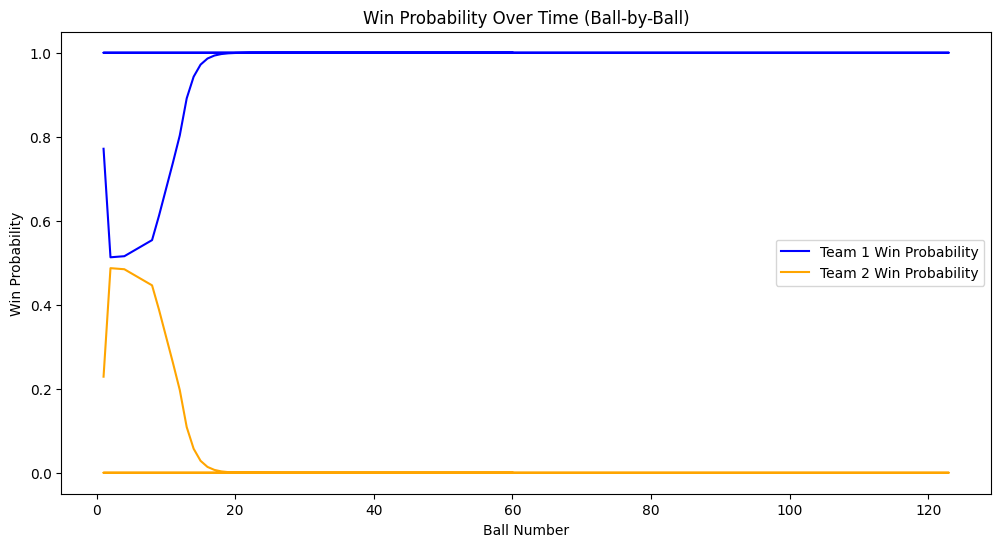

In [29]:
def calculate_win_probabilities(match_data, logreg, model_columns):
    win_probs = []
    
    for i in range(len(match_data)):
        cumulative_data = match_data.iloc[:i+1].sum()
        cumulative_data['ball_number'] = match_data.iloc[i]['ball_number']
        
        cumulative_data = pd.DataFrame([cumulative_data])
        cumulative_data = pd.get_dummies(cumulative_data).reindex(columns=model_columns, fill_value=0)
        
        # Predict win probability
        prob = logreg.predict_proba(cumulative_data)[0]
        win_probs.append(prob)
    print(win_probs)
    
    return np.array(win_probs)

match_id = 202457
match_data = df[df['match_id'] == match_id]

# Calculate win probabilities
win_probabilities = calculate_win_probabilities(match_data, logreg, model_columns)

# Extract probabilities for plotting
team2_probs = [prob[1] for prob in win_probabilities]
team1_probs = [prob[0] for prob in win_probabilities]
ball_numbers = match_data['ball_number']

# plot the change in probabilities as a bar graph
# plt.figure(figsize=(12, 6))
# plt.bar(ball_numbers, team1_probs, label="Team 1 Win Probability", color="blue", alpha=0.6)
# plt.bar(ball_numbers, team2_probs, label="Team 2 Win Probability", color="orange", alpha=0.6)
# plt.xlabel("Ball Number")
# plt.ylabel("Win Probability")
# plt.title("Win Probability Over Time (Ball-by-Ball)")
# plt.legend()
# plt.show()

# # Plotting the probabilities
plt.figure(figsize=(12, 6))
plt.plot(ball_numbers, team1_probs, label="Team 1 Win Probability", color="blue")
plt.plot(ball_numbers, team2_probs, label="Team 2 Win Probability", color="orange")
plt.xlabel("Ball Number")
plt.ylabel("Win Probability")
plt.title("Win Probability Over Time (Ball-by-Ball)")
plt.legend()
plt.show()


In [13]:
#sri rama jayam

import torch
import matplotlib.pyplot as plt
print("done")

done


In [14]:
g=torch.Generator().manual_seed(42)
class Linear:
    def __init__(self,fan_in,fan_out,bias=True):
        self.weight=torch.randn((fan_in,fan_out),generator=g) / fan_in ** 0.5 # with that kaiming initializatio
        self.bias=torch.zeros(fan_out) if bias else None

    def __call__(self, x):
        self.out=x @ self.weight
        if self.bias is not None:
            self.out+=self.bias
        return self.out
    def parameters(self):
        return [self.weight] + ([] if self.bias is None else [self.bias])
    
class BatchNorm1d:
    def __init__(self,dim,eps=1e-5,momentum=0.1):
        self.eps=eps
        self.momentum=momentum
        self.training=True

        self.gamma=torch.ones(dim)
        self.beta=torch.zeros(dim)

        self.running_mean=torch.zeros(dim)
        self.running_var=torch.ones(dim)

    def __call__(self,x):
        if self.training:
            xmean=x.mean(0,keepdim=True)
            xvar=x.var(0 ,keepdim=True)
        
        else:
            xmean=self.running_mean
            xvar=self.running_var
        
        xhat=(x-xmean)/torch.sqrt(xvar+self.eps)
        self.out=self.gamma* xhat +self.beta

        if self.training:
            with torch.no_grad():
                self.running_mean=(1-self.momentum)*self.running_mean+self.momentum*xmean
                self.running_var=(1-self.momentum)*self.running_var+self.momentum*xvar
        return self.out
    def parameters(self):
        return [self.gamma,self.beta]
    
class Tanh:
    def __call__(self,x):
        self.out=torch.tanh(x)
        return self.out
    def parameters(self):
        return []
class ReLU:
    def __call__(self, x):
        self.out = torch.relu(x)  # Applies ReLU activation in-place
        return self.out

    def parameters(self):
        return []


In [30]:
print(type(X_train),type(X_test),type(y_train),type(y_test))

print(y_train)



<class 'torch.Tensor'> <class 'torch.Tensor'> <class 'torch.Tensor'> <class 'torch.Tensor'>
tensor([1, 1, 1,  ..., 2, 2, 2])


In [16]:
print(type(y_train))

print(y_train.unique())


<class 'pandas.core.series.Series'>
[2 1]


In [ ]:
import torch
import torch.nn.functional as F
import sklearn.preprocessing
# from torch.nn import Dropout

X_train,X_test,y_train,y_test=sklearn.model_selection.train_test_split(X_train,y_train,test_size=0.2)#,random_state=42)

X_train = X_train.astype(np.float32)
X_train=X_train.to_numpy()
X_train=torch.from_numpy(X_train)

y_train=y_train.astype(np.int32)
y_train=y_train.to_numpy()
y_train=torch.from_numpy(y_train)

X_test=X_test.astype(np.float32)
X_test=X_test.to_numpy()
X_test=torch.from_numpy(X_test)

y_test=y_test.astype(np.int32)
y_test=y_test.to_numpy()
y_test=torch.from_numpy(y_test)

y_train=y_train.long()




layers = [
    Linear(56, 10),BatchNorm1d(10), Tanh(),
    Linear(10, 10),  BatchNorm1d(10),Tanh(),

    Linear(10, 2),BatchNorm1d(2),Tanh()
]
parameters = [p for layer in layers for p in layer.parameters()]
for p in parameters:
    p.requires_grad = True

optimizer = torch.optim.Adam(parameters, lr=0.01)
lossi = []
max_steps = 5000
batch_size = 32

lr=0.1

for i in range(max_steps):
    ix = torch.randint(0, X_train.shape[0], (batch_size,))
    Xb, Yb = X_train[ix], y_train[ix]
    Yb = (Yb - 1).long()  # Adjusting labels to start from 0

    x = Xb
    for layer in layers:
        x = layer(x)
    loss = F.cross_entropy(x, Yb)

    # Backward pass
    optimizer.zero_grad()
    loss.backward()

    #update
    for p in parameters:
        p=p-lr*p.grad
    optimizer.step()

    # Logging the loss
    if i % 1000 == 0:
        print(f'{i:7d}/{max_steps:7d}: {loss.item():.4f}')
    # if i%10==0:
    lossi.append(loss.item())


      0/   5000: 0.9996
   1000/   5000: 0.5263
   2000/   5000: 0.1555
   3000/   5000: 0.1322
   4000/   5000: 0.1352


In [22]:
Xb,Yb=X_test,y_test

Yb=Yb-1

x=Xb
for layer in layers:
    x=layer(x)

probs=torch.softmax(x,dim=1)

def test_accuracy(probs, Yb):
    preds=[]
    for i in probs:
        if i[0]>i[1]:
            preds.append(0)
        else:
            preds.append(1)
    correct_count = (torch.tensor(preds) == Yb).sum().item()
    accuracy = (correct_count / len(Yb)) * 100
    return accuracy

# Calculate and print accuracy as percentage
print(f"Accuracy: {test_accuracy(probs, Yb):.2f}%")
# print(Yb)
# for i in probs:
#     print(i)

Accuracy: 98.36%


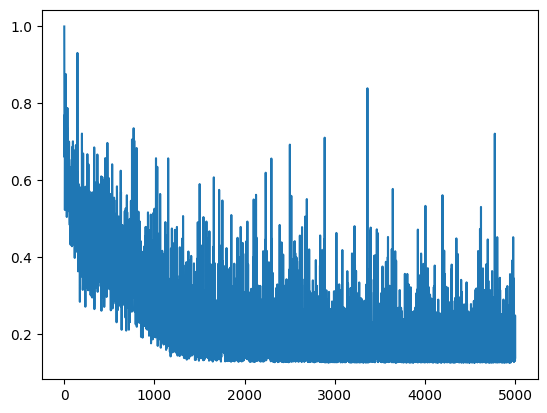

In [23]:
plt.plot(lossi)